In [1]:
# 'Con2D' adds spacial convolution to the image, 'MaxPooling2D' downsamples the input representsation .
# 'BatchNormalization' standardizes the inputs to a layer for each mini-batch.
# 'AveragePooling2D' Average pooling operation for spatial data.
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
# 'Callback' will allow performing action at various stages.
# 'EarlyStopping' will allow the training to stop if the loss is not improved.
# 'ReduceLROnPlateau' will reduce the learning rate if no improvement in training is seen.
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
# 'ImageDataGenerator' Generate batches of tensor image data with real-time data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 'Dense' is densely-connected NN layer, 'Dropout' Applies Dropout to the input.
# 'Activation' Applies the rectified linear unit activation function.
# 'Flatten' reshapes the tensor to have the shape that is equal to the number of elements contained in tensor.
from keras.layers import Dense, Dropout, Activation, Flatten
# 'Adam' and 'SGD' are optimizers for compiling a Keras model.
from tensorflow.keras.optimizers import Adam,SGD
# 'categorical_crossentropy' is being used for losses.
from keras.losses import categorical_crossentropy
# for usage of images in keras.
from tensorflow.keras.preprocessing import image
# 'Sequential' provides training and inference features on model.
from keras.models import Sequential
#from keras.regularizers import l2
# Converts a class vector (integers) to binary class matrix.
from keras.utils import np_utils
# 'matplotlib.pyplot' for plotting graphs of all the data.
import matplotlib.pyplot as plt
# 'tensorflow' for doing doing deeplearning using tensorflow.
import tensorflow as tf
import seaborn as sns
# allows users to rapidly build and iterate on deep learning models.
import pandas as pd
# Converts a class vector (integers) to binary class matrix.
import numpy as np
# 'os' allows the use of operating system dependent functionality.
# 'sys' provides information about constants, functions and methods of the Python interpreter.
import sys, os
# Allows the use of openCV in python for reading and displaying images and video feeds.
import cv2
import tensorflow as tf
# The below code was used because cudnn failing to initialize
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
# Here the dataset in the folder is being directed to the correct path. Three different folder for three different models.abs
# Emotion dataset is in a CSV file.
emotion_training_dataset=pd.read_csv('dataset/emotion_dataset/fer2013.csv')
# For ethnicity both training and validation is in separate folder.
ethnicity_training_dataset_dir = 'dataset/ethnicity_dataset/training'
ethnicity_validation_dataset_dir = 'dataset/ethnicity_dataset/validation'
# Gender dataset also have the training and validation in separate folder.
gender_training_dataset_dir = 'dataset/gender_dataset/training'
gender_validation_dataset_dir = 'dataset/gender_dataset/validation'

#Declaration of classes batch size and resolution of the image.
emotion_classes = 7
ethnicity_classes = 5
gender_classes = 2
batch_size = 32
h_res,v_res = 48,48

In [3]:
emotion_training_dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


<AxesSubplot:xlabel='emotion', ylabel='count'>

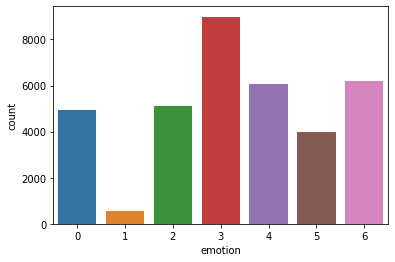

In [4]:
# Shows the distribution of the emotions in the fer2013 dataset.
sns.countplot(x='emotion', data=emotion_training_dataset)

In [5]:
gender_ethnicity_dataset=pd.read_csv('dataset/age_gender.csv')
gender_ethnicity_dataset.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


<AxesSubplot:xlabel='ethnicity', ylabel='count'>

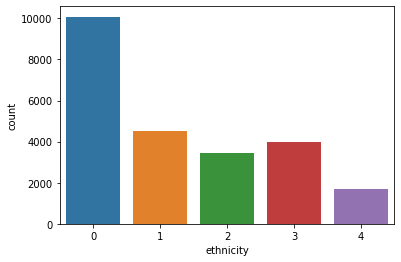

In [6]:
# Shows the distribution of the ethnicity in the ethnicity_gender dataset.
sns.countplot(x='ethnicity', data=gender_ethnicity_dataset)

<AxesSubplot:xlabel='gender', ylabel='count'>

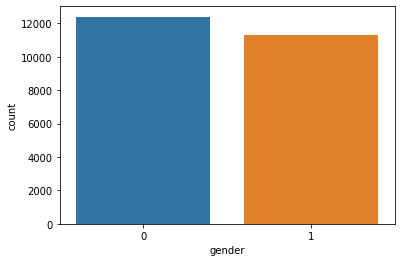

In [7]:
# Shows the distribution of the gender in the ethnicity_gender dataset.
sns.countplot(x='gender', data=gender_ethnicity_dataset)

In [8]:
# The data is being augmented.
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in emotion_training_dataset.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
            X_train.append(np.array(val,'float32'))
            train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
            X_test.append(np.array(val,'float32'))
            test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=emotion_classes)
test_y=np_utils.to_categorical(test_y, num_classes=emotion_classes)

# The data is normalised between 0 and 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)
# reshaping and scaling the images.
X_train = X_train.reshape(X_train.shape[0],h_res,v_res, 1)

X_test = X_test.reshape(X_test.shape[0],h_res,v_res, 1)

In [9]:
# The data being Augmented for the ethnicity dataset.
ethnicity_training_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')

ethnicity_validation_datagen = ImageDataGenerator(rescale=1/255)

# The image is converted into grayscale and the classmode is set to categorical
ethnicity_training_dataset = ethnicity_training_datagen.flow_from_directory(
					ethnicity_training_dataset_dir,
					color_mode='grayscale',
					target_size=(h_res,v_res),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

# The image is converted into grayscale and the classmode is set to categorical same as for the training dataset
ethnicity_validation_dataset = ethnicity_validation_datagen.flow_from_directory(
							ethnicity_validation_dataset_dir,
							color_mode='grayscale',
							target_size=(h_res,v_res),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 21329 images belonging to 5 classes.
Found 2373 images belonging to 5 classes.


In [10]:
# The data being Augmented for the gender dataset it is the same as the ethnicity one.
gender_training_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')

gender_validation_datagen = ImageDataGenerator(rescale=1/255)


gender_training_dataset = gender_training_datagen.flow_from_directory(
					gender_training_dataset_dir,
					color_mode='grayscale',
					target_size=(h_res,v_res),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

gender_validation_dataset = gender_validation_datagen.flow_from_directory(
							gender_validation_dataset_dir,
							color_mode='grayscale',
							target_size=(h_res,v_res),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 21330 images belonging to 2 classes.
Found 2371 images belonging to 2 classes.


In [11]:
# All the three models are the have the same layers and convolution layers.
# 'relu is being used'
emotion_model = Sequential()
# Block 1
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
emotion_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
emotion_model.add(BatchNormalization())
# Block 2
emotion_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
emotion_model.add(Conv2D(128, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
emotion_model.add(Dropout(0.5))
emotion_model.add(BatchNormalization())
# Block 3
emotion_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
emotion_model.add(Conv2D(256, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
emotion_model.add(Dropout(0.5))
emotion_model.add(BatchNormalization())
# Block 4
emotion_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_model.add(Conv2D(512, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
emotion_model.add(Dropout(0.5))
emotion_model.add(BatchNormalization())
# Block 5
emotion_model.add(Flatten())
emotion_model.add(Dense(256, activation='relu'))
emotion_model.add(Dense(256, activation='relu'))
emotion_model.add(Dropout(0.3))
# Block 6
#in the dense layer the class was chaged to 'emotion_classes' as it has 7 classes
emotion_model.add(Dense(emotion_classes, activation='softmax'))
print(emotion_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 128)       0

In [12]:
ethnicity_model = Sequential()
# Block 1
ethnicity_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(h_res,v_res,1)))
ethnicity_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
ethnicity_model.add(BatchNormalization())
# Block 2
ethnicity_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
ethnicity_model.add(Conv2D(128, (3, 3), activation='relu'))
ethnicity_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
ethnicity_model.add(Dropout(0.5))
ethnicity_model.add(BatchNormalization())
# Block 3
ethnicity_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
ethnicity_model.add(Conv2D(256, (3, 3), activation='relu'))
ethnicity_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
ethnicity_model.add(Dropout(0.5))
ethnicity_model.add(BatchNormalization())
# Block 4
ethnicity_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
ethnicity_model.add(Conv2D(512, (3, 3), activation='relu'))
ethnicity_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
ethnicity_model.add(Dropout(0.5))
ethnicity_model.add(BatchNormalization())
# Block 5
ethnicity_model.add(Flatten())
ethnicity_model.add(Dense(256, activation='relu'))
ethnicity_model.add(Dense(256, activation='relu'))
ethnicity_model.add(Dropout(0.3))
# Block 6
#in the dense layer the class was chaged to 'ethnicity_classes' as it has 5 classes
ethnicity_model.add(Dense(ethnicity_classes, activation='softmax'))
print(ethnicity_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 10, 128)      

In [13]:
gender_model = Sequential()
# Block 1
gender_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(h_res,v_res,1)))
gender_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
gender_model.add(BatchNormalization())
# Block 2
gender_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
gender_model.add(Conv2D(128, (3, 3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())
# Block 3
gender_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
gender_model.add(Conv2D(256, (3, 3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())
# Block 4
gender_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
gender_model.add(Conv2D(512, (3, 3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())
# Block 5
gender_model.add(Flatten())
gender_model.add(Dense(256, activation='relu'))
gender_model.add(Dense(256, activation='relu'))
gender_model.add(Dropout(0.3))
# Block 6
#in the dense layer the class was chaged to 'gender_classes' as it has 2 classes
gender_model.add(Dense(gender_classes, activation='softmax'))
print(gender_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 10, 128)      

In [14]:
# Compliling the model
# Optimizer used is Adam
emotion_model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
# will stop training the data after 25 epochs if no improvement is seen.
# dictacted by 'patience' in this case 25.
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=25,
    verbose=1,
    restore_best_weights=True,
)
# will reduce the learning rate if the val_accuracy doesn't improve after 10 epochs.
# dictacted by 'patience' in this case 10.
lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1,
)
# Will call the above functions after each epoch is finished.
callbacks = [
    early_stopping,
    lr_scheduler,
]



# Training the model
# The epoch is et to 200 but will not run till 200 as there is earlystopping implemented.
emotion_model_fit = emotion_model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=200,
          callbacks=callbacks,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)


#Saving the model AND Weight to 'h5' extention so it can be loaded back up later on.
emotion_model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(emotion_model_json)
emotion_model.save_weights("emotion_model.h5")

Epoch 1/200
898/898 [==============================] - 23s 22ms/step - loss: 1.8476 - accuracy: 0.2398 - val_loss: 1.5856 - val_accuracy: 0.3739
Epoch 2/200
898/898 [==============================] - 19s 21ms/step - loss: 1.5264 - accuracy: 0.4034 - val_loss: 1.3284 - val_accuracy: 0.4890
Epoch 3/200
898/898 [==============================] - 20s 22ms/step - loss: 1.4043 - accuracy: 0.4604 - val_loss: 1.3001 - val_accuracy: 0.4979
Epoch 4/200
898/898 [==============================] - 22s 24ms/step - loss: 1.3368 - accuracy: 0.4901 - val_loss: 1.2362 - val_accuracy: 0.5344
Epoch 5/200
898/898 [==============================] - 22s 24ms/step - loss: 1.2964 - accuracy: 0.5078 - val_loss: 1.1833 - val_accuracy: 0.5475
Epoch 6/200
898/898 [==============================] - 21s 24ms/step - loss: 1.2593 - accuracy: 0.5240 - val_loss: 1.1699 - val_accuracy: 0.5495
Epoch 7/200
898/898 [==============================] - 22s 24ms/step - loss: 1.2486 - accuracy: 0.5308 - val_loss: 1.2836 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


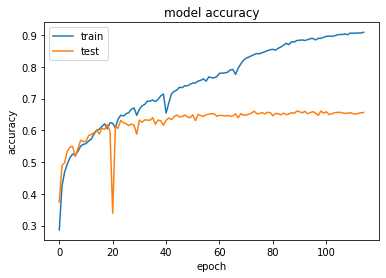

In [15]:
# Will plot the graph of 'emotion_model' which shows the accuracy with accuracy on the y axis and epoch on x axis.
print(emotion_model_fit.history.keys())
plt.plot(emotion_model_fit.history['accuracy'])
plt.plot(emotion_model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

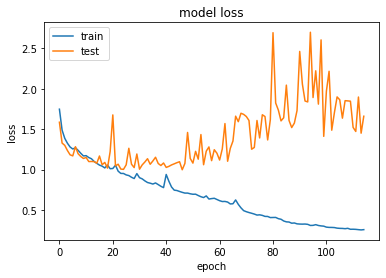

In [16]:
# Will plot the graph of 'emotion_model' which shows the loss with loss on the y axis and epoch on x axis.
plt.plot(emotion_model_fit.history['loss'])
plt.plot(emotion_model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# The model compling for the ethnicity_model is the same as emotion_model.
ethnicity_model.compile(loss=categorical_crossentropy,
              optimizer = Adam(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=25,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]
training_samples = 21329
validation_samples = 2373
epochs=200
ethnicity_model_fit=ethnicity_model.fit(
                ethnicity_training_dataset,
                steps_per_epoch=training_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=ethnicity_validation_dataset,
                validation_steps=validation_samples//batch_size)

ethnicity_json = ethnicity_model.to_json()
with open("ethnicity_model.json", "w") as json_file:
    json_file.write(ethnicity_json)
ethnicity_model.save_weights("ethnicity_model.h5")

================] - 21s 31ms/step - loss: 1.1139 - accuracy: 0.5807 - val_loss: 0.8547 - val_accuracy: 0.7023
Epoch 16/200
666/666 [==============================] - 21s 31ms/step - loss: 1.0647 - accuracy: 0.6079 - val_loss: 1.3025 - val_accuracy: 0.5114
Epoch 17/200
666/666 [==============================] - 21s 31ms/step - loss: 1.0799 - accuracy: 0.5988 - val_loss: 0.8741 - val_accuracy: 0.6947
Epoch 18/200
666/666 [==============================] - 21s 31ms/step - loss: 1.0384 - accuracy: 0.6223 - val_loss: 0.9999 - val_accuracy: 0.6689
Epoch 19/200
666/666 [==============================] - 21s 31ms/step - loss: 1.0473 - accuracy: 0.6199 - val_loss: 0.7818 - val_accuracy: 0.7230
Epoch 20/200
666/666 [==============================] - 21s 31ms/step - loss: 1.0407 - accuracy: 0.6188 - val_loss: 0.7896 - val_accuracy: 0.7242
Epoch 21/200
666/666 [==============================] - 21s 31ms/step - loss: 1.0304 - accuracy: 0.6263 - val_loss: 0.9679 - val_accuracy: 0.6850
Epoch 22/200
6

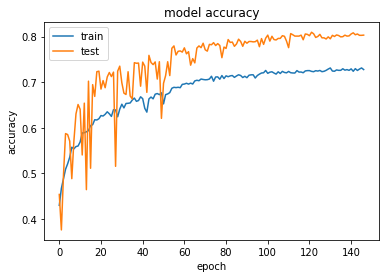

In [18]:
# Will plot the graph of 'ethnicity_model' which shows the accuracy with accuracy on the y axis and epoch on x axis.
plt.plot(ethnicity_model_fit.history['accuracy'])
plt.plot(ethnicity_model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

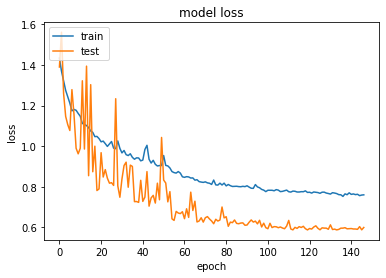

In [19]:
# Will plot the graph of 'ethnicity_model' which shows the loss with loss on the y axis and epoch on x axis.
plt.plot(ethnicity_model_fit.history['loss'])
plt.plot(ethnicity_model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
gender_model.compile(loss=categorical_crossentropy,
              optimizer = Adam(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=25,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

training_samples = 21330
validation_samples = 2171
epochs=200
gender_model_fit=gender_model.fit(
                gender_training_dataset,
                steps_per_epoch=training_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=gender_validation_dataset,
                validation_steps=validation_samples//batch_size)

gender_json = gender_model.to_json()
with open("gender_model.json", "w") as json_file:
    json_file.write(gender_json)
gender_model.save_weights("gender_model.h5")

Epoch 1/200
666/666 [==============================] - 19s 28ms/step - loss: 0.7205 - accuracy: 0.5488 - val_loss: 0.6301 - val_accuracy: 0.6590
Epoch 2/200
666/666 [==============================] - 14s 21ms/step - loss: 0.6587 - accuracy: 0.6090 - val_loss: 0.8645 - val_accuracy: 0.5784
Epoch 3/200
666/666 [==============================] - 17s 25ms/step - loss: 0.6349 - accuracy: 0.6500 - val_loss: 0.5285 - val_accuracy: 0.7220
Epoch 4/200
666/666 [==============================] - 14s 21ms/step - loss: 0.5868 - accuracy: 0.7037 - val_loss: 0.4756 - val_accuracy: 0.7561
Epoch 5/200
666/666 [==============================] - 14s 21ms/step - loss: 0.5692 - accuracy: 0.7143 - val_loss: 0.4818 - val_accuracy: 0.7761
Epoch 6/200
666/666 [==============================] - 14s 21ms/step - loss: 0.5483 - accuracy: 0.7307 - val_loss: 0.4264 - val_accuracy: 0.8004
Epoch 7/200
666/666 [==============================] - 14s 21ms/step - loss: 0.5241 - accuracy: 0.7437 - val_loss: 0.4870 - val_ac

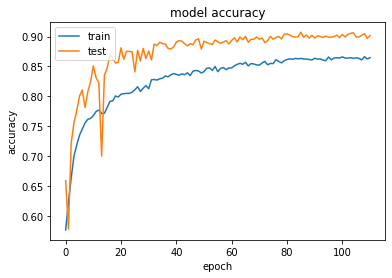

In [21]:
# Will plot the graph of 'gender_model' which shows the accuracy with accuracy on the y axis and epoch on x axis.
plt.plot(gender_model_fit.history['accuracy'])
plt.plot(gender_model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

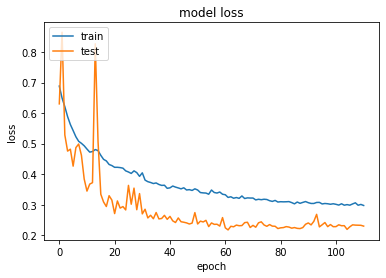

In [22]:
# Will plot the graph of 'gender_model' which shows the loss with loss on the y axis and epoch on x axis.
plt.plot(gender_model_fit.history['loss'])
plt.plot(gender_model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
# Allows importing weight files that were created when training
from keras.models import model_from_json
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
#load gender model
gender_model = model_from_json(open("gender_model.json", "r").read())
#load gender weights
gender_model.load_weights('gender_model.h5')
#load emotion model
emotion_model = model_from_json(open("emotion_model.json", "r").read())
#load emotion weights
emotion_model.load_weights('emotion_model.h5')
#load ethnicity model
ethnicity_model = model_from_json(open("ethnicity_model.json", "r").read())
#load ethnicity weights
ethnicity_model.load_weights('ethnicity_model.h5')
# Loading the XML file which will allow openCV to etect face in a pacticular frame.
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Classsifing all the classes in the particular model so it can be named in the output.
# gender have 2 classes
genders = ('Female','Male')
# emotion have 7 classes
emotions = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral')
# ethnicity have 5 classes.
ethnicities = ('Asian','Black','Hispanic','Indian','White')

Face No: 1
Race: White
Gender: Male
Emotion: Neutral


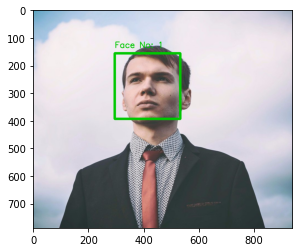

Face No: 2
Race: White
Gender: Female
Emotion: Happy


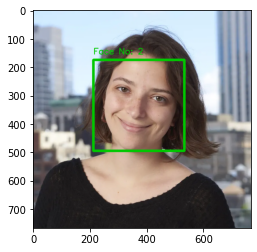

Face No: 3
Race: White
Gender: Female
Emotion: Fear


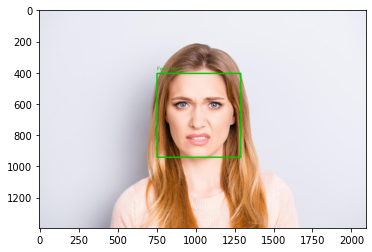

Face No: 4
Race: White
Gender: Male
Emotion: Fear


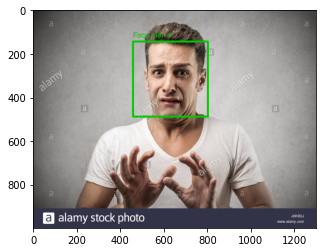

Face No: 5
Race: Asian
Gender: Female
Emotion: Neutral


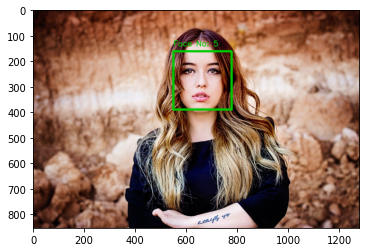

Face No: 6
Race: Black
Gender: Male
Emotion: Sad


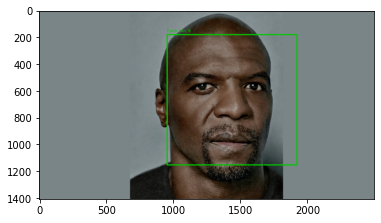

Face No: 7
Race: Asian
Gender: Female
Emotion: Happy


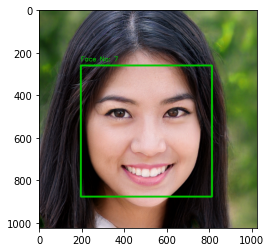

Face No: 8
Race: White
Gender: Female
Emotion: Angry


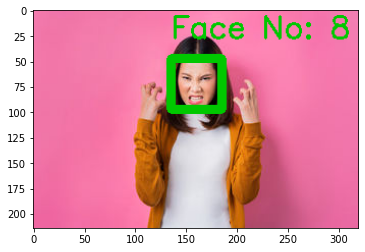

Face No: 9
Race: Hispanic
Gender: Female
Emotion: Happy


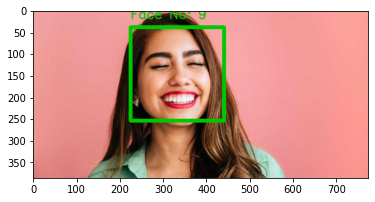

Face No: 10
Race: Black
Gender: Female
Emotion: Happy


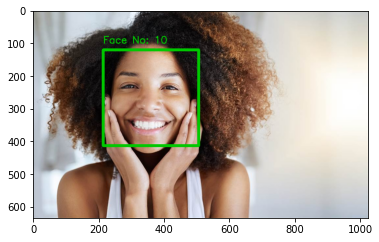

Face No: 11
Race: Asian
Gender: Male
Emotion: Surprise


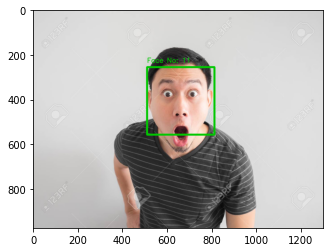

Face No: 12
Race: White
Gender: Female
Emotion: Disgust


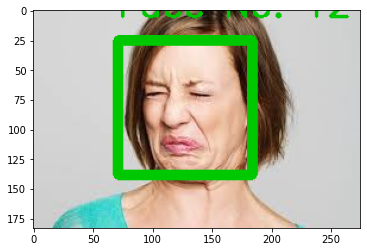

Face No: 13
Race: Indian
Gender: Female
Emotion: Happy


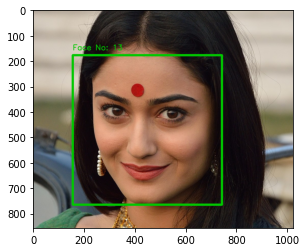

In [3]:
num = 0 # used to count the detected faces
dir_path = "test_data" # directory o the test images in the computer.
# a loop that will go through each of the images in the file.
for i in os.listdir(dir_path):
    test_img = cv2.imread(dir_path+'//'+ i)
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)
    # if a face is detected this loop will 
    for (x,y,w,h) in faces_detected:
        num += 1 # increases the face number as each face detected 
        face_num = "Face No: " + str(num)
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,200,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]# cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))# Converting the detected image into 48 x 48 pixels for making prediction
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255
        # Predictions being made on besed on the three models
        gender_predictions = gender_model.predict(img_pixels)
        emotion_predictions = emotion_model.predict(img_pixels)
        ethnicity_predictions = ethnicity_model.predict(img_pixels)
        # Storing the max indexed array in the variable.
        gender_max_index = np.argmax(gender_predictions[0])
        emotion_max_index = np.argmax(emotion_predictions[0])
        ethnicity_max_index = np.argmax(ethnicity_predictions[0])
        # The final result being stored in variable.
        predicted_gender ="Gender: " + genders[gender_max_index]
        predicted_emotion ="Emotion: " + emotions[emotion_max_index]
        predicted_ethnicity ="Race: " + ethnicities[ethnicity_max_index]
        # putting the face number text in the image frame to understand which prediction belongs to which face.
        cv2.putText(test_img, face_num, (int(x), int(y-20)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,200,0), 2)
        # The prediction being printed above the picture
        print(face_num)
        print(predicted_ethnicity)
        print(predicted_gender)
        print(predicted_emotion)

    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
# Very similar to the image one but we will apply prediction to each frame of a video.
# will capture the video feed from webcam.
# can change the video source with multiple camera by changing the value 0 to 1, 2 etc.
# can also change from live feed to a video by changing 0 to the directory of the video.
cap=cv2.VideoCapture(0)
while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,200,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        gender_predictions = gender_model.predict(img_pixels)
        emotion_predictions = emotion_model.predict(img_pixels)
        ethnicity_predictions = ethnicity_model.predict(img_pixels)

        gender_max_index = np.argmax(gender_predictions[0])
        emotion_max_index = np.argmax(emotion_predictions[0])
        ethnicity_max_index = np.argmax(ethnicity_predictions[0])

        predicted_gender ="Gender: " + genders[gender_max_index]
        predicted_emotion ="Emotion: " + emotions[emotion_max_index]
        predicted_ethnicity ="Race: " + ethnicities[ethnicity_max_index]
        # Putting the prediction on screen above the Rectangle of the corresponding face.
        cv2.putText(test_img, predicted_ethnicity, (int(x), int(y-70)), cv2.FONT_HERSHEY_SIMPLEX, 1, (200,85,0), 2)
        cv2.putText(test_img, predicted_gender, (int(x), int(y-45)), cv2.FONT_HERSHEY_SIMPLEX, 1, (200,0,200), 2)
        cv2.putText(test_img, predicted_emotion, (int(x), int(y-20)), cv2.FONT_HERSHEY_SIMPLEX, 1, (200,200,0), 2)

    resized_img = cv2.resize(test_img, (1000, 700))# Resizing the window of the camera feed.
    cv2.imshow('Face Analysis',resized_img)# will show the prediction on the video window.



    if cv2.waitKey(10) == ord('q'):# wait until 'q' key is pressed.
        break

cap.release()
cv2.destroyAllWindows